주피터 노트북 사용자의 경우  
판다스 라이브러리가 설치되어 있지 안다면 아래의 코드를 실행후 사용

In [3]:
!pip install pandas

#Section 02. 시리즈
### 리스트 데이터를 판다스 시리즈로 직접 변환하기

In [4]:
import pandas as pd
pd.Series([1, 2, 3, 4, 5]) 

0    1
1    2
2    3
3    4
4    5
dtype: int64

In [5]:
pd_s=pd.Series([1, 2, 3, 4, 5])
type(pd_s)

pandas.core.series.Series

### 리스트 변수를 판다스 시리즈로 변환하기

In [6]:
pd_l=[1, 2, 3, 4, 5]
pd_s1=pd.Series(pd_l)
print(pd_s1)
type(pd_s1)


0    1
1    2
2    3
3    4
4    5
dtype: int64


pandas.core.series.Series

#Section 03. 데이터 프레임
##1. 데이터프레임 생성
### 1차원 리스트를 데이터프레임으로 변환하기

In [7]:
#임의의 데이터 프레임 생성 할 때
# 강사 추천 : 딕셔너리 활용
temp_df = pd.DataFrame({
    'A' : [1, 2, 3],
    'B' : ['A', 'B', 'c']
})

In [8]:
pd_s2=pd.DataFrame(pd_l)
pd_s2

,0
0,1
1,2
2,3
3,4
4,5


In [9]:
type(pd_s2)

pandas.core.frame.DataFrame

In [10]:
pd_l=[1, 2, 3, 4, 5]
pd_s2=pd.DataFrame(pd_l)
pd_s2['1열']=pd_l
pd_s2

,0,1열
0,1,1
1,2,2
2,3,3
3,4,4
4,5,5


In [11]:
pd_s2.columns

Index([0, '1열'], dtype='object')

In [12]:
# 이 문법 기억하기
pd_s3=pd_s2.rename(columns={0:'0열'})
pd_s3

,0열,1열
0,1,1
1,2,2
2,3,3
3,4,4
4,5,5


###2차원 리스트를 데이터프레임으로 변환하기

In [13]:
# 각 행과 열이 됨
score=[['정약용', 70, 80, 100],
 ['이순신', 100, 80, 70],
 ['이율곡', 90, 95, 90]]
print(type(score))
score

<class 'list'>


[['정약용', 70, 80, 100], ['이순신', 100, 80, 70], ['이율곡', 90, 95, 90]]

In [14]:
score_df=pd.DataFrame(score)
print(type(score_df))
score_df

<class 'pandas.core.frame.DataFrame'>


,0,1,2,3
0,정약용,70,80,100
1,이순신,100,80,70
2,이율곡,90,95,90


In [15]:
score_df.columns=['성명1', '국어1', '영어1', '수학1']
score_df

,성명1,국어1,영어1,수학1
0,정약용,70,80,100
1,이순신,100,80,70
2,이율곡,90,95,90


In [16]:
score_df.columns=['성명', '국어', '영어', '수학']
score_df

,성명,국어,영어,수학
0,정약용,70,80,100
1,이순신,100,80,70
2,이율곡,90,95,90


In [17]:
score_df_r=score_df.rename(columns={'국어':'korean', '영어':'english', '수학':'math'})
score_df_r

,성명,korean,english,math
0,정약용,70,80,100
1,이순신,100,80,70
2,이율곡,90,95,90


In [18]:
score_df_r.values

array([['정약용', 70, 80, 100],
       ['이순신', 100, 80, 70],
       ['이율곡', 90, 95, 90]], dtype=object)

In [21]:
a = score_df_r.values # ==> 2차원 NumPy 배열의 의미
a.shape, a.ndim

((3, 4), 2)

###딕셔너리를 데이터프레임으로 만들기

In [22]:
score_dict={'성명': ['정약용', '이순신', '이율곡'],
 '국어': [70, 80, 100],
 '영어': [100, 80, 70],
 '수학': [90, 95, 90]}
print(score_dict, type(score_dict))

{'성명': ['정약용', '이순신', '이율곡'], '국어': [70, 80, 100], '영어': [100, 80, 70], '수학': [90, 95, 90]} <class 'dict'>


In [23]:
score_dict_df=pd.DataFrame(score_dict)
print(type(score_dict_df))
score_dict_df

<class 'pandas.core.frame.DataFrame'>


,성명,국어,영어,수학
0,정약용,70,100,90
1,이순신,80,80,95
2,이율곡,100,70,90


In [28]:
score_dict_df.shape

(3, 4)

In [25]:
score_dict_df.index # 행의 인덱스

RangeIndex(start=0, stop=3, step=1)

In [26]:
score_dict_df.columns # 열 이름 목록, object는 문자열

Index(['성명', '국어', '영어', '수학'], dtype='object')

In [27]:
score_dict_df.values

array([['정약용', 70, 100, 90],
       ['이순신', 80, 80, 95],
       ['이율곡', 100, 70, 90]], dtype=object)

In [29]:
n=pd.DataFrame({'col_str1':['1', '2', '3', '4'],
 'col_str2':['5', '6', '7', '8']})
print(n)
n.dtypes

  col_str1 col_str2
0        1        5
1        2        6
2        3        7
3        4        8


col_str1    object
col_str2    object
dtype: object

In [31]:
n.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   col_str1  4 non-null      object
 1   col_str2  4 non-null      object
dtypes: object(2)
memory usage: 196.0+ bytes


In [32]:
n_df=n.astype({'col_str1':int, 'col_str2':float})
print(n_df)
n_df.dtypes

   col_str1  col_str2
0         1       5.0
1         2       6.0
2         3       7.0
3         4       8.0


col_str1      int64
col_str2    float64
dtype: object

### <여기서 잠깐> 판다스의 데이터형

In [33]:
score_dict_df.dtypes

성명    object
국어     int64
영어     int64
수학     int64
dtype: object

##2. 데이터프레임 사용
### 특정 열을 인덱스로 지정하기

In [34]:
score_dict_df

,성명,국어,영어,수학
0,정약용,70,100,90
1,이순신,80,80,95
2,이율곡,100,70,90


In [41]:
# set_indes()
score_dict_df.set_index("성명")

,국어,영어,수학
성명,,,
정약용,70,100,90
이순신,80,80,95
이율곡,100,70,90


In [35]:
# 은근히 자주 사용됨
score_dict_df.index=score_dict_df['성명']
score_dict_df

,성명,국어,영어,수학
성명,,,,
정약용,정약용,70,100,90
이순신,이순신,80,80,95
이율곡,이율곡,100,70,90


In [36]:
score_dict_df.index=score_dict_df['성명']
print(type(score_dict_df))

<class 'pandas.core.frame.DataFrame'>


### 행/열 삭제하기 (중요)

In [37]:
score_dict_df

,성명,국어,영어,수학
성명,,,,
정약용,정약용,70,100,90
이순신,이순신,80,80,95
이율곡,이율곡,100,70,90


In [38]:
# axis = 1, 컬럼 핸들링
# axis = 0, 행 핸들링
score_dict_df.drop(['성명'], axis=1)

,국어,영어,수학
성명,,,
정약용,70,100,90
이순신,80,80,95
이율곡,100,70,90


In [39]:
score_dict_df.drop(['이순신'], axis=0)

,성명,국어,영어,수학
성명,,,,
정약용,정약용,70,100,90
이율곡,이율곡,100,70,90


In [40]:
#기초 문법 : 위치 기반
score_dict_df.drop(score_dict_df.index[2])

,성명,국어,영어,수학
성명,,,,
정약용,정약용,70,100,90
이순신,이순신,80,80,95


### <여기서 잠깐> 행 데이터를 완전히 삭제하기

In [43]:
score_dict_df

,국어,영어,수학
성명,,,
정약용,70,100,90
이순신,80,80,95
이율곡,100,70,90


In [42]:
# inplace = True 이 문법은 pandas에서 권장하지 않음
# inplace => 즉시 update 하겠음
score_dict_df.drop(['성명'], axis=1,inplace=True)
score_dict_df

,국어,영어,수학
성명,,,
정약용,70,100,90
이순신,80,80,95
이율곡,100,70,90


##3. 유용한 데이터프레임 조작 기능

In [44]:
import pandas as pd
x=[0, 1, 2, 3, 4, 5]
y=[0, 2, 4, 6, 8, 10]
df=pd.DataFrame( ) # 빈 데이터 프레임 생성
df['x_value']=x #컬럼 추가 1
df['y_value']=y #컬럼 추가 2
df

,x_value,y_value
0,0,0
1,1,2
2,2,4
3,3,6
4,4,8
5,5,10


In [46]:
# 사칙연산 가능, 같은 행끼리 연산, 새로운 컬럼 추가
df['xy_value']=df['x_value'] * df['y_value']
df

,x_value,y_value,xy_value
0,0,0,0
1,1,2,2
2,2,4,8
3,3,6,18
4,4,8,32
5,5,10,50


### 인덱스 새로 지정하기: set_index 함수

In [50]:
index=['zero', 'one', 'two', 'three', 'four', 'five']
df['number']=index
df

,x_value,y_value,xy_value,number
0,0,0,0,zero
1,1,2,2,one
2,2,4,8,two
3,3,6,18,three
4,4,8,32,four
5,5,10,50,five


#### [기존 인덱스 유지하기]

In [51]:
df.set_index('number', append=True)

,,x_value,y_value,xy_value
,number,,,
0,zero,0,0,0
1,one,1,2,2
2,two,2,4,8
3,three,3,6,18
4,four,4,8,32
5,five,5,10,50


#### [기존 인덱스 지우기]

In [52]:
df2=df.set_index('number', append=False)
df2

,x_value,y_value,xy_value
number,,,
zero,0,0,0
one,1,2,2
two,2,4,8
three,3,6,18
four,4,8,32
five,5,10,50


### 기존 인덱스 삭제하고 초기화하기: reset_index 함수

In [53]:
df3=df2.reset_index(drop=True)
df3

,x_value,y_value,xy_value
0,0,0,0
1,1,2,2
2,2,4,8
3,3,6,18
4,4,8,32
5,5,10,50


 ### 날짜로 인덱스 만들기: pd.date_range 함수

In [54]:
# 임의의 날짜 데어터 생성 할때 자주 활용
dates=pd.date_range('20230101', periods=6)
dates

DatetimeIndex(['2023-01-01', '2023-01-02', '2023-01-03', '2023-01-04',
               '2023-01-05', '2023-01-06'],
              dtype='datetime64[ns]', freq='D')

In [55]:
df4=df2.reset_index(drop=True)
df5=df4.set_index(dates)
df5

,x_value,y_value,xy_value
2023-01-01,0,0,0
2023-01-02,1,2,2
2023-01-03,2,4,8
2023-01-04,3,6,18
2023-01-05,4,8,32
2023-01-06,5,10,50


### index 속성으로 인덱스 추출하기

In [56]:
df5.index

DatetimeIndex(['2023-01-01', '2023-01-02', '2023-01-03', '2023-01-04',
               '2023-01-05', '2023-01-06'],
              dtype='datetime64[ns]', freq='D')

### value 속성으로 행 데이터 추출하기

In [57]:
df5.values

array([[ 0,  0,  0],
       [ 1,  2,  2],
       [ 2,  4,  8],
       [ 3,  6, 18],
       [ 4,  8, 32],
       [ 5, 10, 50]])

### 차트 만들기: plot 함수

<Axes: xlabel='number'>

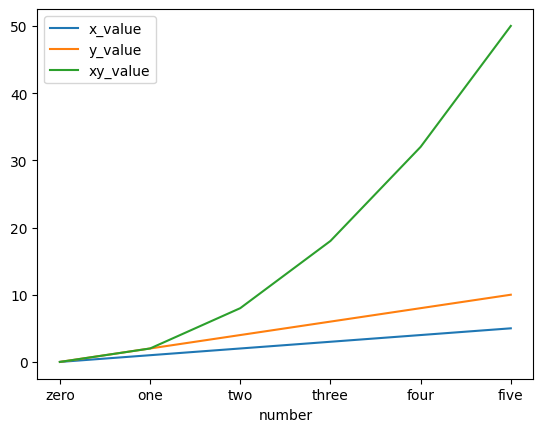

In [58]:
df2.plot( )

### 특정 열을 기준으로 정렬하기: sort_values 함수

In [59]:
df5.sort_values(by='x_value', ascending=False) # x_value 열을 기준으로 내림차순 정렬

,x_value,y_value,xy_value
2023-01-06,5,10,50
2023-01-05,4,8,32
2023-01-04,3,6,18
2023-01-03,2,4,8
2023-01-02,1,2,2
2023-01-01,0,0,0


### 평균값 열 추가하기: mean 함수

In [60]:
# 참고, 수식이 적용된 값을 새로운 컬럼에 추가
df5['mean']=df5.mean(axis=1)
df5

,x_value,y_value,xy_value,mean
2023-01-01,0,0,0,0.000000
2023-01-02,1,2,2,1.666667
2023-01-03,2,4,8,4.666667
2023-01-04,3,6,18,9.000000
2023-01-05,4,8,32,14.666667
2023-01-06,5,10,50,21.666667
